<a href="https://colab.research.google.com/github/haiderrizvi1441/Netflix_EDA/blob/main/Netflix_Kaggle_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Netflix Kaggle Exploratory Data Analysis

Dataset - https://www.kaggle.com/shivamb/netflix-shows

By Haider Rizvi 


In [104]:
# Importing Libraries and Dataset

In [105]:
import pandas as pd
import os
import plotly.express as px

In [106]:
# use os.chdir to change the current directory
os.getcwd()
os.chdir("/content/drive/MyDrive/Collab Data Files/Netlix_EDA")
os.getcwd()

'/content/drive/MyDrive/Collab Data Files/Netlix_EDA'

In [107]:
data_import = pd.read_csv("netflix_titles.csv")

In [108]:
# converting date_added column to time format
data_import['date_added']= pd.to_datetime(data_import["date_added"].str.strip(), format="%B %d, %Y")
# .str.strip as there was a space before date causing error


In [109]:
data_import.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Ma...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."


##HIGH LEVEL EDA

In [110]:
# Exploring data types
data_import.dtypes
# Dates should be imported as Date format not String


show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

### Describing the Numerical column in data


In [111]:
data_import.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


##Histogram of Release Date of films

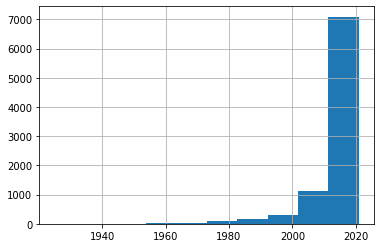

In [112]:
data_import['release_year'].hist()

In [113]:
## plotly offers much better graphs than matplotlib
px.histogram(data_import, x='release_year')

In [114]:
# Looking for the oldest film
data_import[data_import["release_year"] == 1925]["description"]

4250    This collection restores films from women who tackled hot-button issues, transcended norms, and left a mark on the history of cinema and the industry.
Name: description, dtype: object

In [115]:
data_import.iloc[4250]

show_id                                                                                                                                                          s4251
type                                                                                                                                                           TV Show
title                                                                                                                                Pioneers: First Women Filmmakers*
director                                                                                                                                                           NaN
cast                                                                                                                                                               NaN
country                                                                                                                                                            Na

In [116]:
## to display full text while printing dataframe
pd.options.display.max_colwidth = 200

In [117]:
data_import.iloc[4250]

show_id                                                                                                                                                          s4251
type                                                                                                                                                           TV Show
title                                                                                                                                Pioneers: First Women Filmmakers*
director                                                                                                                                                           NaN
cast                                                                                                                                                               NaN
country                                                                                                                                                            Na

##When did Netflix added the films to its collection

In [118]:
px.histogram(data_import,"date_added")

##Extract Month from date Added

In [119]:
data_import['month_added']= data_import['date_added'].dt.month.fillna(0)
# fillna fills all the empty cell in the new coloumn with NA . 
# it is very important to not to have any empy cells in data . use fillna(o)

In [120]:
px.histogram(data_import, x="date_added", color="month_added")

# In which month Netflix likes to bring most movies

In [121]:
px.histogram(data_import, x="month_added", color='type')

from the above histogram we can see that it is almost same for all the months

## On what day Netflix upload most of the content

In [122]:
data_import['day_added'] = data_import['date_added'].dt.day.fillna(0)

In [123]:
# Histogram will show on which day most content is uploaded
px.histogram(data_import, x="day_added",color ='type')

The above histogram shows that netflix adds the movies on the first day of the month

##STRING COLUMN ANALYSIS

In [124]:
data_import.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'day_added'],
      dtype='object')

In [125]:
data_import['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [126]:
px.histogram(data_import, x='rating', color='type')

##Simplifying the Country tab in data

We want to give 1 count of credit to each country when their name appear once in the list . 

In [127]:

data_import['country'].unique()


array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [128]:
## to split the countries 
data_import["country"].str.split(",", expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,United States,None,None,None,None,None,None,None,None,None,None,None
1,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,United States,None,None,None,None,None,None,None,None,None,None,None
8803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8804,United States,None,None,None,None,None,None,None,None,None,None,None
8805,United States,None,None,None,None,None,None,None,None,None,None,None


In [129]:
## We will transpose and then melt the data to transform from horizontal to vertical data

country_count = data_import.copy()
country_count = pd.concat([country_count, data_import["country"].str.split(",", expand=True, )], axis=1)
country_count = country_count.melt(id_vars=["type", "title"], value_vars=range(12), value_name="Country")

# Dropping all the None and NA coloumn
country_count = country_count[country_count["Country"].notna()]

# Dropping all the junk columns
country_count.drop('variable', axis='columns', inplace=True)


In [130]:
# Cleaning the spaces in before-after names to avoid repliation of names , for ex - 'United' & ' United'
country_count["Country"] = country_count["Country"].str.strip()

## Number of Movies/Shows produced by in each country

In [131]:
# Number of unique countries
country_count["Country"].nunique()

123

In [132]:
# Name of all the Unique countries
country_count["Country"].unique()

array(['United States', 'South Africa', 'India', 'United Kingdom',
       'Germany', 'Mexico', 'Turkey', 'Australia', 'Finland', 'China',
       'Nigeria', 'Japan', 'Spain', 'France', 'Belgium', 'South Korea',
       'Argentina', 'Russia', 'Canada', 'Hong Kong', 'Italy', '',
       'Ireland', 'New Zealand', 'Jordan', 'Colombia', 'Switzerland',
       'Israel', 'Brazil', 'Taiwan', 'Bulgaria', 'Poland', 'Saudi Arabia',
       'Thailand', 'Indonesia', 'Egypt', 'Kuwait', 'Malaysia', 'Vietnam',
       'Sweden', 'Lebanon', 'Romania', 'Philippines', 'Iceland',
       'Denmark', 'United Arab Emirates', 'Netherlands', 'Norway',
       'Syria', 'Mauritius', 'Austria', 'Czech Republic', 'Cameroon',
       'Uruguay', 'Kenya', 'Chile', 'Luxembourg', 'Bangladesh',
       'Portugal', 'Hungary', 'Senegal', 'Singapore', 'Serbia', 'Namibia',
       'Peru', 'Mozambique', 'Belarus', 'Ghana', 'Zimbabwe',
       'Puerto Rico', 'Pakistan', 'Cyprus', 'Paraguay', 'Croatia',
       'Cambodia', 'Georgia', 'Sovie

In [133]:
# How many time did each unique quantity occured
country_count['Country'].value_counts()

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Uganda               1
Lithuania            1
Bermuda              1
Armenia              1
Somalia              1
Name: Country, Length: 123, dtype: int64

In [134]:
px.histogram(country_count, x="Country",color="type")

In [135]:
# Sorting the Graphs in descending order
px.histogram(country_count, x="Country",color="type").update_xaxes(categoryorder="total descending")

## Ratings

In [136]:
# No of unique in Rating
data_import['rating'].unique()


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [137]:
# Occurence of each unique element in rating 
data_import['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
66 min         1
84 min         1
74 min         1
Name: rating, dtype: int64

In [138]:
px.histogram(data_import, x="rating", color='type').update_xaxes(categoryorder='total descending')

In [139]:
## dropping the dirty values(66min, 84min, 74min)
#data_import['rating'] = data_import[(data_import.rating !='66 min') & (data_import.rating !='84 min') & (data_import.rating !='74 min') ]

In [ ]:
px.histogram(data_import, 'rating')

## IMPORTANT -  print value of column 1 according to some condition of column2

What are the films titles that are rated NC-17

In [148]:
rated_NC17 = data_import.set_index('title').eq("NC-17")

In [152]:
rated_NC17.index[rated_NC17['rating']]


Index(['Swearnet: The Movie', 'Blue Is the Warmest Color', 'Lady-Like'], dtype='object', name='title')

# Adding the Cast count column 

In [157]:
# We will split the cast column by comma to get count of cast
data_import['cast_count'] = data_import['cast'].str.split(",")
# dropping NaN from cast count
data_import = data_import[data_import['cast_count'].notna()] 

# Counting the number of objects in the list of cast_count using LAMBDA Function
data_import['cast_count'] = data_import['cast_count'].apply(lambda x: len(x))

In [158]:
data_import['cast_count']

1       19
2        9
4        8
5       16
6       10
        ..
8801     6
8802    10
8804     7
8805     9
8806     8
Name: cast_count, Length: 7982, dtype: int64

This Graph shows the number of movies (X-axis) with number of cast members(y - axis)

In [160]:
px.histogram(data_import , x='cast_count',color='type')